### Implement K-means from scratch
#### In this notebook, we will use K-means clustering to cluster the data points in the dataset. We will use the elbow method to find the optimal number of clusters.

In [19]:
### Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans_implemenation import kmeans

In [20]:
### Load the data
data1 = pd.read_csv('data/Dataset1.csv').values
data2 = pd.read_csv('data/Dataset2.csv').values

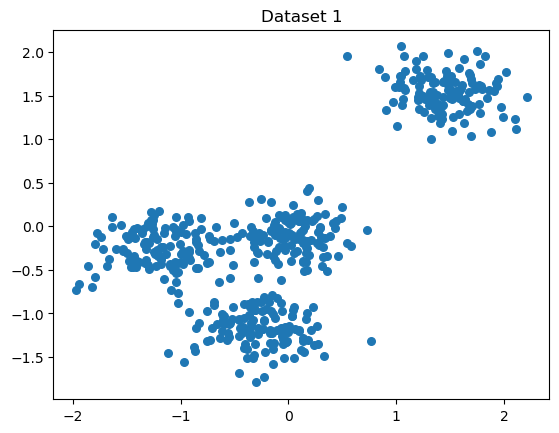

In [21]:
### Plot the frist dataset
plt.title('Dataset 1')
plt.scatter(data1[:, 0], data1[:, 1], s=30)
plt.show()

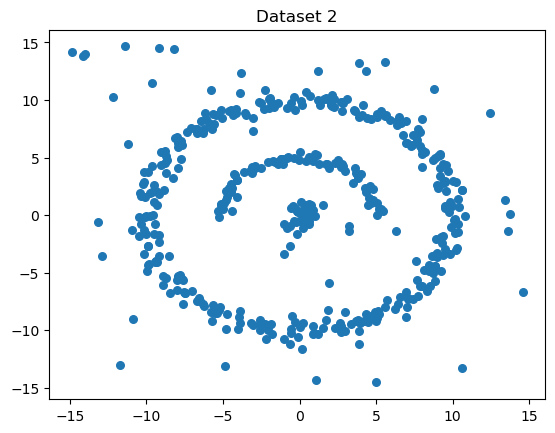

In [22]:
### Plot the second dataset (clustering is not possible with kmeans)
plt.title('Dataset 2')
plt.scatter(data2[:, 0], data2[:, 1], s=30)
plt.show()

In [23]:
### Define the error function
def err(data, centers, labeled):
    
    labels = np.arange(len(centers))
    erros = []
    
    for label in labels:
        di = data[np.where(labeled == label)]
        ei = np.mean(np.linalg.norm(di - centers[label], axis=1))
        erros += [ei]

    return np.array(erros)

In [24]:
### Plot the results
def plot(data, centers, labeled):
    
    # plot data
    plt.scatter(data[:, 0], data[:, 1], s=30, c=labeled)
    
    # plot centers
    plt.scatter(centers[:, 0], centers[:, 1], s=70, c='r', marker='s')     
    
    plt.show()

In [25]:
### Test the algorithm
def test(k, data, limit):
    
    centers, labeled = kmeans(k, data, limit)
    errs = err(data, centers, labeled)
    clustering_err = np.mean(errs)
    
    print(('k = {}').format(k))
    for i in range(k):
        print(('cluster error for cluster{} : {}').format(i + 1, errs[i]))
    
    print(('clustering error for k = {}: {}').format(k, clustering_err))
        
    plot(data, centers, labeled)


In [26]:
### Elbow method implementation
def elbow(data, max_k):
    
    elbow_errs = []
    
    for i in range(1, max_k + 1):
        
        centers, labeled = kmeans(i, data, 20)
        clustring_err = np.mean(err(data, centers, labeled))
        elbow_errs += [clustring_err]
    
    plt.title('Elbow method')
    plt.plot(list(range(1, max_k + 1)), elbow_errs)
    plt.savefig('elbow.png')
    plt.show()

k = 2
cluster error for cluster1 : 0.31600881957734733
cluster error for cluster2 : 0.7491160326963786
clustering error for k = 2: 0.532562426136863


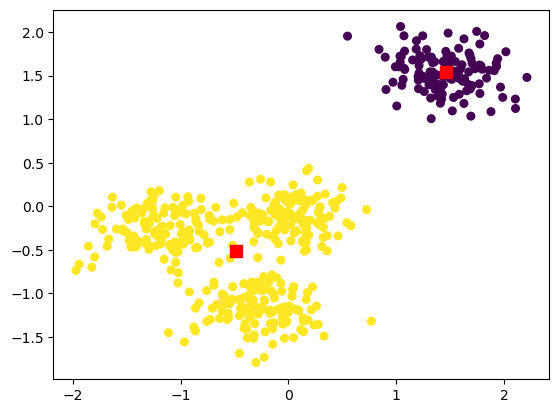

k = 3
cluster error for cluster1 : 0.33987023164913976
cluster error for cluster2 : 0.6163639287851188
cluster error for cluster3 : 0.31600881957734733
clustering error for k = 3: 0.424080993337202


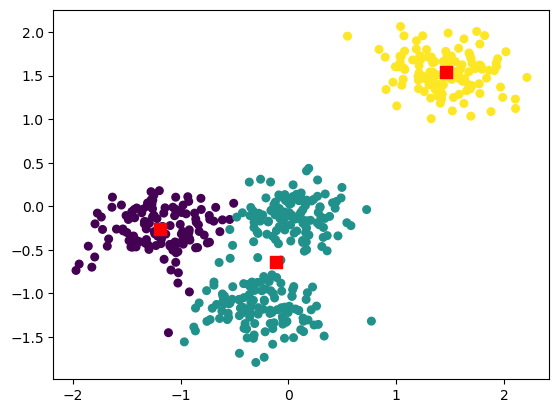

k = 4
cluster error for cluster1 : 0.28865973975955667
cluster error for cluster2 : 0.3361233209400449
cluster error for cluster3 : 0.31600881957734733
cluster error for cluster4 : 0.3238368940541009
clustering error for k = 4: 0.3161571935827624


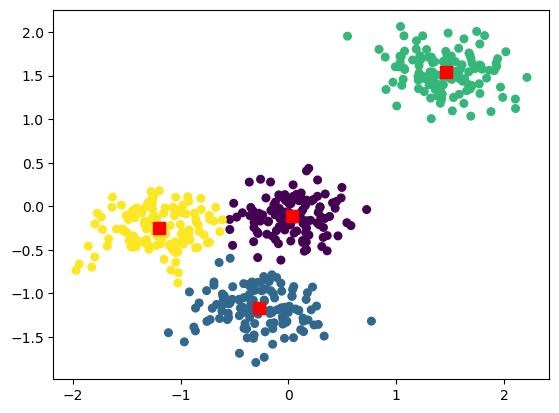

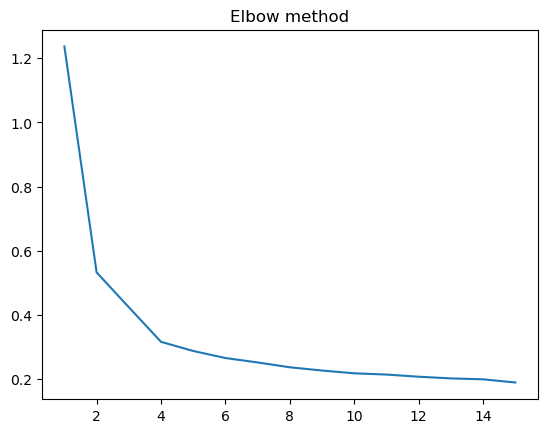

k = 2
cluster error for cluster1 : 6.599582622069388
cluster error for cluster2 : 7.292984993903717
clustering error for k = 2: 6.9462838079865525


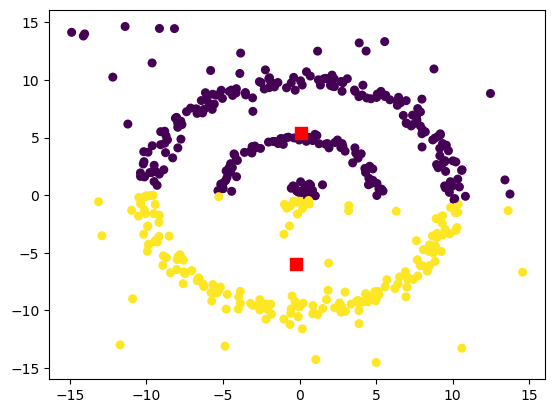

In [27]:
if __name__ == '__main__':
    
    N = 20 # number of iterations
    
    # test the algorithm on dataset 1
    test(k=2, data=data1, limit=N)
    test(k=3, data=data1, limit=N)
    test(k=4, data=data1, limit=N)
    elbow(data1, max_k=15)
    
    # test the algorithm on dataset 2
    test(k=2, data=data2, limit=N)

#### Conclusion
1) The elbow method shows that the best k for dataset 1 is 4
2) K-means algorithm can not cluster dataset 2, because the clusters are not spherical